In [28]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [29]:
df = pd.read_csv("data/winequality-red_revised.csv")

In [30]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.350,0.46,3.6,0.078,15.0,37,0.99730,3.35,0.86,12.80,8
1,10.3,0.320,0.45,6.4,0.073,5.0,13,0.99760,3.23,0.82,12.60,8
2,5.6,0.850,0.05,1.4,0.045,12.0,88,0.99240,3.56,0.82,12.90,8
3,12.6,0.310,0.72,2.2,0.072,6.0,29,0.99870,2.88,0.82,9.80,8
4,11.3,0.620,0.67,5.2,0.086,6.0,19,0.99880,3.22,0.69,13.40,8
...,...,...,...,...,...,...,...,...,...,...,...,...
295,7.6,1.580,0.00,2.1,0.137,5.0,9,0.99476,3.50,0.40,10.90,3
296,6.8,0.815,0.00,1.2,0.267,16.0,29,0.99471,3.32,0.51,9.80,3
297,7.3,0.980,0.05,2.1,0.061,20.0,49,0.99705,3.31,0.55,9.70,3
298,7.1,0.875,0.05,5.7,0.082,3.0,14,0.99808,3.40,0.52,10.20,3


In [31]:
# 결측치 확인
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
df['quality'].value_counts()
#csv파일을 변경하였고, quality가 고르고 분포되어있음.

quality
8    50
7    50
6    50
5    50
4    50
3    50
Name: count, dtype: int64

In [33]:
df['quality'].mean()

5.5

In [34]:
df['quality'].max()

8

In [35]:
#전처리 (quality 3~4면 나쁨 : 0 / 5~6이면 보통 : 1 / 7~8이면 좋음 : 2)
df['quality'] = df.quality.map({3:0, 4:0, 5:1, 6:1, 7:2, 8:2})

In [36]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.350,0.46,3.6,0.078,15.0,37,0.99730,3.35,0.86,12.80,2
1,10.3,0.320,0.45,6.4,0.073,5.0,13,0.99760,3.23,0.82,12.60,2
2,5.6,0.850,0.05,1.4,0.045,12.0,88,0.99240,3.56,0.82,12.90,2
3,12.6,0.310,0.72,2.2,0.072,6.0,29,0.99870,2.88,0.82,9.80,2
4,11.3,0.620,0.67,5.2,0.086,6.0,19,0.99880,3.22,0.69,13.40,2
...,...,...,...,...,...,...,...,...,...,...,...,...
295,7.6,1.580,0.00,2.1,0.137,5.0,9,0.99476,3.50,0.40,10.90,0
296,6.8,0.815,0.00,1.2,0.267,16.0,29,0.99471,3.32,0.51,9.80,0
297,7.3,0.980,0.05,2.1,0.061,20.0,49,0.99705,3.31,0.55,9.70,0
298,7.1,0.875,0.05,5.7,0.082,3.0,14,0.99808,3.40,0.52,10.20,0


In [37]:
# Input 변수(X)와 Output 변수(y) 구분
X = np.array(df.iloc[:,:-1])
y = np.array(df['quality'])

In [38]:
X

array([[ 7.9  ,  0.35 ,  0.46 , ...,  3.35 ,  0.86 , 12.8  ],
       [10.3  ,  0.32 ,  0.45 , ...,  3.23 ,  0.82 , 12.6  ],
       [ 5.6  ,  0.85 ,  0.05 , ...,  3.56 ,  0.82 , 12.9  ],
       ...,
       [ 7.3  ,  0.98 ,  0.05 , ...,  3.31 ,  0.55 ,  9.7  ],
       [ 7.1  ,  0.875,  0.05 , ...,  3.4  ,  0.52 , 10.2  ],
       [ 6.7  ,  0.76 ,  0.02 , ...,  3.55 ,  0.63 ,  9.95 ]])

In [39]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [40]:
# 트레이닝 셋트와 테스트 셋트로 데이터 구분(여기서는 7:3으로 구분)
from sklearn.model_selection import train_test_split

# random_state는 반복적으로 같은 결과를 내기 위해서 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (210, 11)
y_train 크기: (210,)
X_test 크기: (90, 11)
y_test 크기: (90,)


In [41]:
train_scores, test_scores = list(), list()
# train_score와 test_score의 정확도를 저장 장소
# train_score는 훈련데이터에 특화될수록 증가
# test_score는 테스트데이터에 일반화될수록 증가

In [42]:
# 의사결정나무모델에 데이터 적합(fitting)
from sklearn.tree import DecisionTreeClassifier

#의사결정나무 모델의 depth 조절(1부터 19까지)
for i in range(1,20):
    DT1 = DecisionTreeClassifier(max_depth=i)
    #깊이를 증가시키면서 의사결정나무 모델 적합
    DT1.fit(X_train, y_train)
    
    #training dataset 정확도 평가
    train_att = DT1.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    #train 정확도와 test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.576, test: 0.567
>2, train: 0.710, test: 0.633
>3, train: 0.767, test: 0.611
>4, train: 0.824, test: 0.633
>5, train: 0.890, test: 0.667
>6, train: 0.933, test: 0.722
>7, train: 0.962, test: 0.711
>8, train: 0.976, test: 0.700
>9, train: 0.986, test: 0.678
>10, train: 0.990, test: 0.678
>11, train: 0.995, test: 0.678
>12, train: 1.000, test: 0.667
>13, train: 1.000, test: 0.656
>14, train: 1.000, test: 0.656
>15, train: 1.000, test: 0.667
>16, train: 1.000, test: 0.656
>17, train: 1.000, test: 0.656
>18, train: 1.000, test: 0.667
>19, train: 1.000, test: 0.667


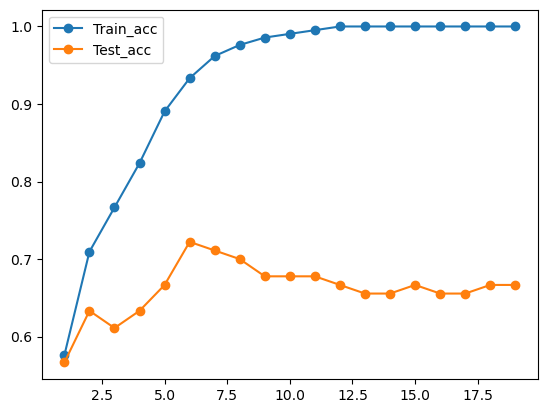

In [43]:
#그래프 그리기

from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label='Train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label='Test_acc')
pyplot.legend()
pyplot.show()

#최적의 의사결정나무 깊이는? 6

In [44]:
# 의사결정나무모델에 데이터 적합(fitting)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0) #max_depth 미지정
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [45]:
temp_y_pred = tree.predict(X_test)
#Training값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [1 1 2 0 1 1 0 0 2 2 1 2 1 0 0 2 0 2 0 1 1 1 1 2 0 1 1 0 0 0 2 2 2 1 2 2 1
 1 1 2 0 2 2 2 1 0 0 2 2 2 2 0 0 1 2 1 1 1 2 1 0 1 2 1 0 0 1 0 1 1 1 0 0 1
 0 2 2 2 0 1 1 1 1 0 2 1 2 0 0 1]
실제값
 [0 1 2 0 0 1 0 0 2 1 0 2 1 0 2 2 0 2 0 1 1 1 1 1 0 1 1 0 0 0 2 2 2 1 0 1 1
 1 0 2 0 2 2 2 2 1 0 2 2 2 2 0 1 1 2 0 1 2 0 1 1 1 2 0 0 0 0 1 2 2 1 0 0 2
 1 0 2 2 1 1 1 1 0 0 0 2 0 0 0 0]


In [46]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc_before = accuracy_score(y_test, temp_y_pred)

print('정확도: ', format(temp_acc_before))

정확도:  0.6666666666666666


In [47]:
#의사결정나무의 깊이를 설정하여 재학습
#파라미터(max_depth)에 최적깊이 값 부여

tree = DecisionTreeClassifier(random_state=0, max_depth=6) #max_depth 6으로 지정
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [48]:
temp_y_pred = tree.predict(X_test)
#Training값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [0 1 2 0 1 1 0 2 2 2 1 2 1 0 0 2 0 2 0 1 1 1 1 2 0 1 1 0 0 0 2 2 2 1 0 2 1
 1 0 2 0 2 2 2 1 0 0 2 2 2 2 0 0 1 2 1 1 1 0 1 0 1 2 1 0 0 1 2 2 1 1 0 0 1
 0 2 2 2 0 1 1 1 1 2 0 1 2 0 0 0]
실제값
 [0 1 2 0 0 1 0 0 2 1 0 2 1 0 2 2 0 2 0 1 1 1 1 1 0 1 1 0 0 0 2 2 2 1 0 1 1
 1 0 2 0 2 2 2 2 1 0 2 2 2 2 0 1 1 2 0 1 2 0 1 1 1 2 0 0 0 0 1 2 2 1 0 0 2
 1 0 2 2 1 1 1 1 0 0 0 2 0 0 0 0]


In [49]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc_after = accuracy_score(y_test, temp_y_pred)

print('정확도: ', format(temp_acc_after))

정확도:  0.7222222222222222


In [54]:
#최적화에 따른 정확도 비교

print('최적화 이전 정확도 : %.3f, 최적화 이후 정확도 : %.3f' % (temp_acc_before, temp_acc_after))

최적화 이전 정확도 : 0.667, 최적화 이후 정확도 : 0.722


In [55]:
#60211356 장유진